# Лабораторная работа №4. Синтез КИХ-фильтров.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ
#  Модуль 3. Оптимизационные методы.

## План занятий лабораторной работы №4
* Mетод частотной выборки (Frequency Sampling Method) — *занятие 1 модуль 1*.
* Метод окон (window method) — *занятие 2 модуль 2*.
* **Оптимальные методы** — *занятие 3 модуль 3*.
* * Наименьших квадратов (least-squares error minimization).
* * Равномерной Чебышёвской аппроксимации (minimax method, Parks–McClellan filter design algorithm, Remez algorithm).
* Фильтрация АМ-сигнала, полученного с помощью цифрового осциллографа — *занятие 4 модуль 4*.

In [1]:
%matplotlib inline

# %matplotlib notebook

# %matplotlib widget

# Установка widget
#!pip install --upgrade jupyterlab ipympl

In [2]:
# Импорт библиотек
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import matplotlib.ticker as ticker

## Основные способы синтеза КИХ-фильтров
* Mетод частотной выборки (Frequency Sampling Method)
* Метод окон (window method)
* Оптимальные методы
* * Наименьших квадратов (least-squares error minimization)
* * Равномерной Чебышёвской аппроксимации (minimax method, Parks–McClellan filter design algorithm, Remez algorithm)

## Тестовое задание (общее для модулей 2 и 3)

Синтезировать КИХ-фильтр нижних частот оконным методом при заданных требованиях к АЧХ:

* частота дискретизации $f_s=2000$ Гц,
* граничная частота полосы пропускания $f_1=450$ Гц,
* граничная частота полосы задерживания $f_2=550$ Гц,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1=0,1$, 
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2=0,05$.

In [3]:
fs=2000
f1=450
f2=550
delta1=0.1
delta2=0.05

##  Оптимальные методы синтеза КИХ-фильтров

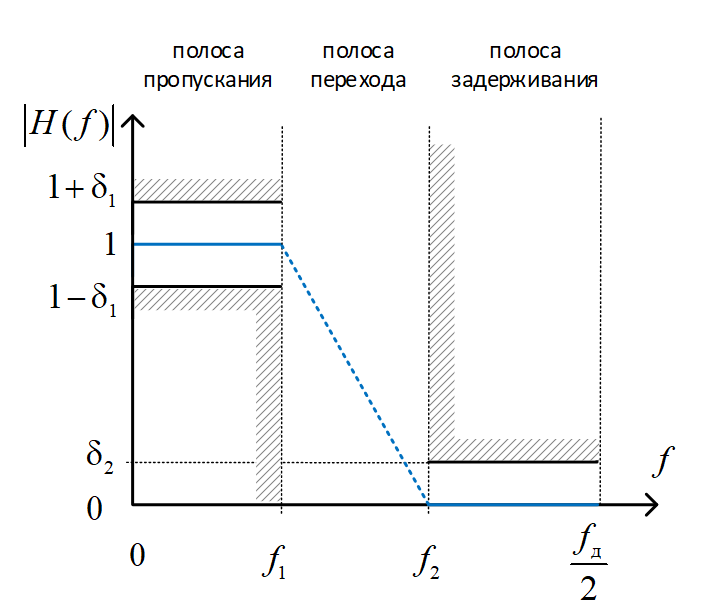

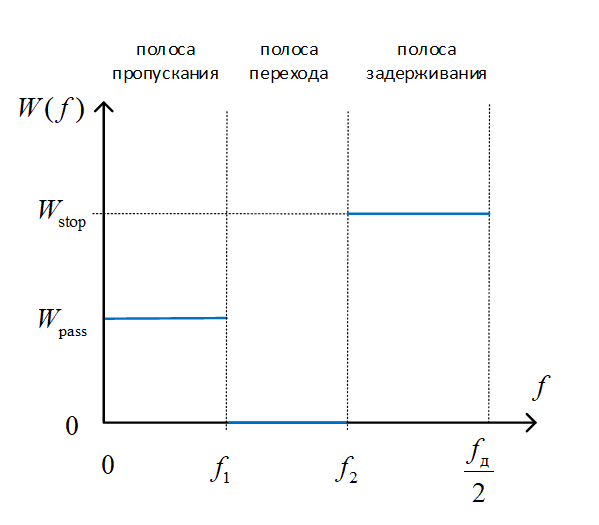

Невязка в данном случае — взвешенная  ошибка:

$E(\theta )=W(\theta )\left( {{H}_{d}}(\theta )-H(\theta ) \right)$
где 

* $W(\theta)$ — весовая функция, будем считать, что  $0\le W(\theta ) \le 1$ при $\theta \in [-\pi ; \pi]$ и $W(\theta ) = 0$ иначе;
* ${H}_d{(\theta)}$ — желаемая частотная характеристика (desired frequency response);
* ${H}(\theta)$ — получившаяся частотная характеристика.

$$W_\text{pass} \delta_1 = W_\text{stop} \delta_2$$

$$W_\text{pass} 0.1 = W_\text{stop} 0.05$$

Тогда можно взять, например, веса $W_\text{stop}=1$ и $W_\text{pass} =0,5$

Минимизируем на интервале $\theta \in [-\pi ; \pi]$ некоторую выбранную норму (либо квадрат нормы) невязки

$${{\left\| E(\theta ) \right\|}_{p}} \to \min,$$

$${{\left\| W(\theta )\left( {{H}_{d}}(\theta )-H(\theta ) \right) \right\|}_{p}} \to \min, $$

## Метод наименьших квадратов (Least-squares algorithm)


$$\left({{\left\| E(\theta ) \right\|}_{2}} \right)^2 \to \min$$

$$\underset{h[k]}{\mathop{\min }}\,\ \ \mathop{\int }_{-\pi }^{\pi }{{\left| E(\theta ) \right|}^{2}}d\theta $$

$$\underset{h[k]}{\mathop{\min }}\,\ \ \mathop{\int }_{-\pi }^{\pi }{{\left| W(\theta )\left( {{H}_{d}}(\theta )-H(\theta ) \right)\right|}^{2}}d\theta $$

В SciPy этот метод доступен в виде функции `scipy.signal.firls`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firls.html

In [4]:
N=31

`bands`  — границы частотных диапазонов на интервале $[0, \; f_s/2]$

В данном случае $0$, $f_1$, $f_2$, $\dfrac{f_s}{2}$.

In [5]:
bands = np.array([0, f1, f2, fs/2])

`desired`  — ожидаемые значения  АЧХ **на границах** частотных диапазонов
В данном случае $$|H_d(0)|=1, \;\; |H_d(f_1)|=1,$$ $$|H_d(f_2)|=0,  |H_d(0.5f_s)|=0.$$ 

In [6]:
desired = np.array([1, 1, 0, 0])

`weight`  — значения весовой функции в полосах пропускания и задерживания 
$$f \in (0, f_1) \;\; W(f)=0.5$$
$$f \in (f_2, f_s/2) \;\; W(f)=1$$

In [7]:
weight = np.array([0.5, 1])

`scipy.signal.firls` — синтез фильтра по методу Least-squares (FIR LS)

Для функции `scipy.signal.firls` число отсчетов импульсной характеристики `N` должно быть нечетным и больше 1. 

In [8]:
h=signal.firls(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

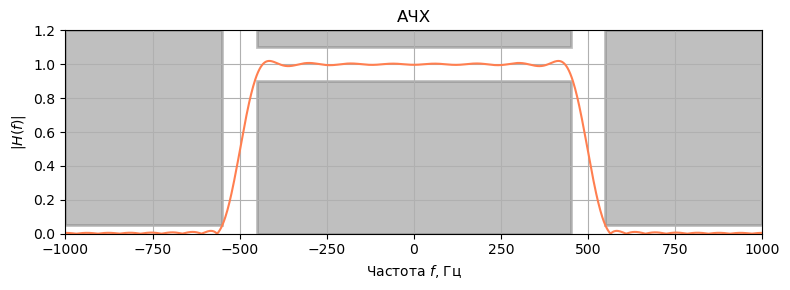

In [9]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

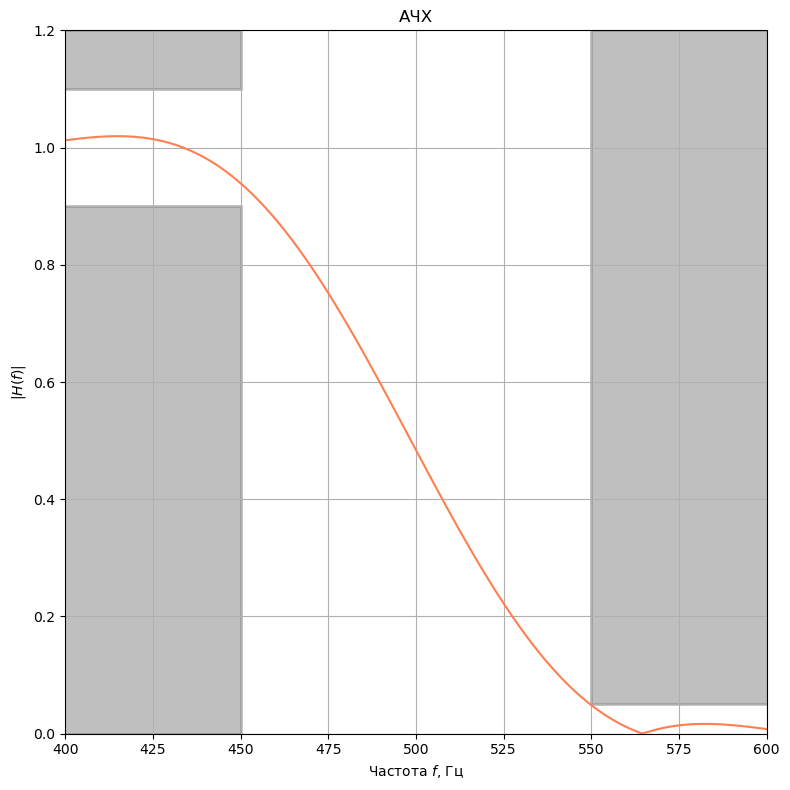

In [10]:
M=1024
plt.figure(figsize=[8, 8])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.xlim([400, 600])
plt.tight_layout()
plt.show()

## Метод равномерной Чебышёвской аппроксимации (minimax method)

* Parks–McClellan filter design algorithm, Remez algorithm



$$\ \underset{h[k]}{\mathop{\min }}\,\ \ \underset{\theta }{\mathop{\max }}\,\ {{\left| E(\theta ) \right|}} $$
$$\ \underset{h[k]}{\mathop{\min }}\,\ \ \underset{\theta }{\mathop{\max }}\,\ {{\left| W(\theta )\left( {{H}_{d}}(\theta )-H(\theta ) \right) \right|}}$$


$${{\left\| E(\theta ) \right\|}_{p=\infty}} \to \min$$

* При больших $p$ все больший вес имеют точки, где отклонение максимально.

* $p=\infty$ на практике приводит к равномерным пульсациям АЧХ в полосах пропускания и задерживания (equiripple filter design).

* Для решения задачи есть итерационный алгоритм Паркса – Макклеллана (Parks–McClellan), основанный на чебышевской аппроксимации и алгоритме замены Ремеза (Remez algorithm).

In [11]:
N=20

`bands`  — границы частотных диапазонов на интервале $[0, \; f_s/2]$

В данном случае $0$, $f_1$, $f_2$, $\dfrac{f_s}{2}$.

In [12]:
bands = np.array([0, f1, f2, fs/2])

`desired`  — ожидаемые значения АЧХ **внутри** частотных диапазонов
$$f \in (0, f_1) \;\; |H_d(f)|=1$$
$$f \in (f_2, f_s/2) \;\; |H_d(f)|=0$$

In [13]:
desired = np.array([1, 0])

`weight`  — значения весовой функции в полосах пропускания и задершивания 
$$f \in (0, f_1) \;\; W(f)=0.5$$
$$f \in (f_2, f_s/2) \;\; W(f)=1$$

In [14]:
weight = np.array([0.5, 1])

In [15]:
h = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

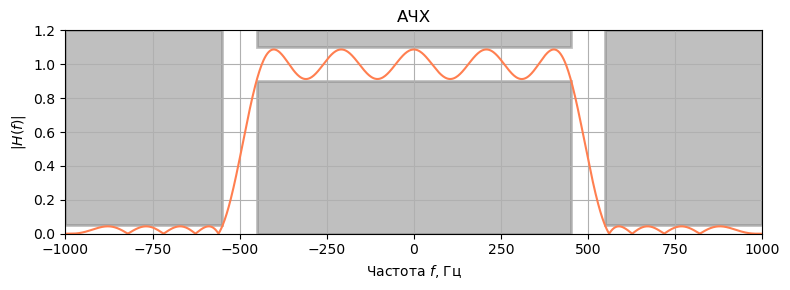

In [16]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

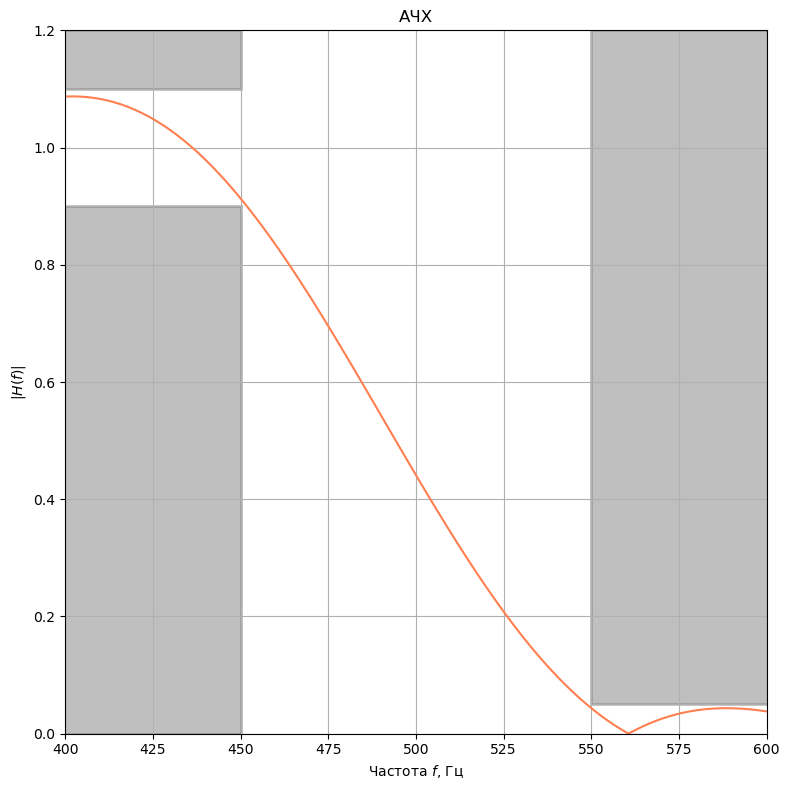

In [17]:
M=1024
plt.figure(figsize=[8, 8])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.xlim([400, 600])
plt.tight_layout()
plt.show()

## Итерационная процедура синтеза КИХ-фильтров

1) Выбрать начальный порядок фильтра $R$.

2) Cинтезировать КИХ-фильтр порядка $R$ выбранным методом.

3) Проверить выполнение требований к АЧХ фильтра. 
* Если требования не выполняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2.
* Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. 
* Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Процедура подходит для синтеза КИХ-фильтров методами наименьших квадратов и равномерной Чебышёвской аппроксимации, а также оконным методом (кроме окна Кайзера). 

## Рекомендуемая литература 
* Солонина, А. И. Цифровая обработка сигналов в зеркале MATLAB : учебное пособие / А. И. Солонина .— Санкт-Петербург : БХВ-Петербург, 2021 .— 560 с. — (Учебная литература для вузов).
* Васильев, В. П. Основы теории и расчета цифровых фильтров : учебное пособие / В. П. Васильев, Э. Л. Муро, С. М. Смольский ; под ред. С. М. Смольского .— 2-е изд., стереотип. — Москва : ИНФРА-М, 2020 .— 272 с.


Книги есть в библиотеке МФТИ. 
## Дополнительные материалы

* Синтез КИХ-фильтров с помощью оптимизационных методов / Shao-Po Wu, Stephen Boyd, Lieven Vandenberghe (Stanford University) https://web.stanford.edu/~boyd/papers/magdes.html